<a href="https://colab.research.google.com/github/Eddy-Emmanuel/Brain-Tumor-Classification-YOLOV8/blob/main/Brain_Tumor_Classification_YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-tumor-classification-mri:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F672377%2F1183165%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240330T082339Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3c051eba818ba8eb041c925c6ac7249e3dd24cd6a2f03abe2d6a79dd0ae007b8e0fdcbcab650378f8b30b0cc6981e01166fbdf235cc3c6745795559e5e482fb5f0562872bc88f05373ff3a0be4df6a57e48e1bfe1594d8c57de37147267ade9f2d8fb6336ac7040ca779006af697d1c6ceb851118d1a8a157095100f2a8df5a7becf2b0fc6a7ccbfcca918a4fc9d6ab423b91039c1e9777a92edd5046c604486dfe46081f57ec9db801ddea0f2c380a9d4f949c35818f7ff7a4b3cd19283f44ca6049af84390ec401882ba50e0f8bd32477108d149b62493d291f8230fed97e97ea47ee2c74fc569891e96be7c58b2cd5469de3a8a570c95a4099f08be81909b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 91002358 bytes downloaded
Downloaded and uncompressed: brain-tumor-classification-mri
Data source import complete.


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
import os
from ultralytics import YOLO

In [4]:
os.listdir("/kaggle/input/brain-tumor-classification-mri")

['Training', 'Testing']

In [5]:
cls_model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.30M/5.30M [00:00<00:00, 73.7MB/s]


In [6]:
import cv2
import glob
import shutil

In [7]:
def Load_Data(split_type):
  import pandas as pd
  data = {"images":[], "labels":[]}
  for cls_path in glob.glob(f"/kaggle/input/brain-tumor-classification-mri/*{split_type}/*"):
    for img in os.listdir(cls_path):
      img_cls = cls_path.split("/")[-1].title()
      img_pth = os.path.join(cls_path, img)
      data["images"].append(img_pth)
      data["labels"].append(img_cls)
  return pd.DataFrame(data)

In [8]:
train_df = Load_Data("Training")
test_df = Load_Data("Testing")

print(train_df.shape, test_df.shape)

(2870, 2) (394, 2)


In [9]:
train_df["labels"].value_counts()

Pituitary_Tumor     827
Glioma_Tumor        826
Meningioma_Tumor    822
No_Tumor            395
Name: labels, dtype: int64

In [10]:
def Create_Dir(subfolders):
    os.mkdir("data")
    for folder in ["train", "test"]:
        os.mkdir(f"/content/data/{folder}")
        for subfolder in subfolders:
            os.mkdir(os.path.join(f"/content/data/{folder}", subfolder))

In [11]:
Create_Dir(["Pituitary_Tumor", "Glioma_Tumor", "Meningioma_Tumor", "No_Tumor"])

In [12]:
for img, lbl in zip(train_df["images"], train_df["labels"]):
  shutil.copy(src=img, dst=f"/content/data/train/{lbl}")

for img, lbl in zip(test_df["images"], test_df["labels"]):
  shutil.copy(src=img, dst=f"/content/data/test/{lbl}")

In [13]:
image_path = "/content/data"

In [22]:
cls_model.train(data=image_path, epochs=20, imgsz=224)

Ultralytics YOLOv8.1.37 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data, epochs=20, time=None, patience=5, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=True, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/data/train... 2870 images, 0 corrupt: 100%|██████████| 2870/2870 [00:00<?, ?it/s]
val: Scanning /content/data/test... 394 images, 0 corrupt: 100%|██████████| 394/394 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train222
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]

                   all      0.777          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]

                   all      0.703          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all      0.789          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.14it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.491G      0.152         22        224: 100%|██████████| 90/90 [00:23<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.491G     0.1317         22        224: 100%|██████████| 90/90 [00:24<00:00,  3.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.491G     0.1092         22        224: 100%|██████████| 90/90 [00:23<00:00,  3.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.491G    0.09343         22        224: 100%|██████████| 90/90 [00:23<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.491G     0.1031         22        224: 100%|██████████| 90/90 [00:23<00:00,  3.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.491G    0.08806         22        224: 100%|██████████| 90/90 [00:25<00:00,  3.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.20it/s]

                   all      0.807          1
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 10, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



15 epochs completed in 0.123 hours.
Optimizer stripped from runs/classify/train222/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train222/weights/best.pt, 3.0MB

Validating runs/classify/train222/weights/best.pt...
Ultralytics YOLOv8.1.37 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/data/train... found 2870 images in 4 classes ✅ 
val: None...
test: /content/data/test... found 394 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


                   all       0.82          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train222
Results saved to runs/classify/train222


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780875c2e4a0>
curves: []
curves_results: []
fitness: 0.9098984599113464
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8197969198226929, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9098984599113464}
save_dir: PosixPath('runs/classify/train222')
speed: {'preprocess': 0.07123874528759022, 'inference': 0.27303163170209394, 'loss': 0.000248705675154168, 'postprocess': 0.0002529415382346526}
task: 'classify'
top1: 0.8197969198226929
top5: 1.0

In [23]:
from keras.utils import load_img

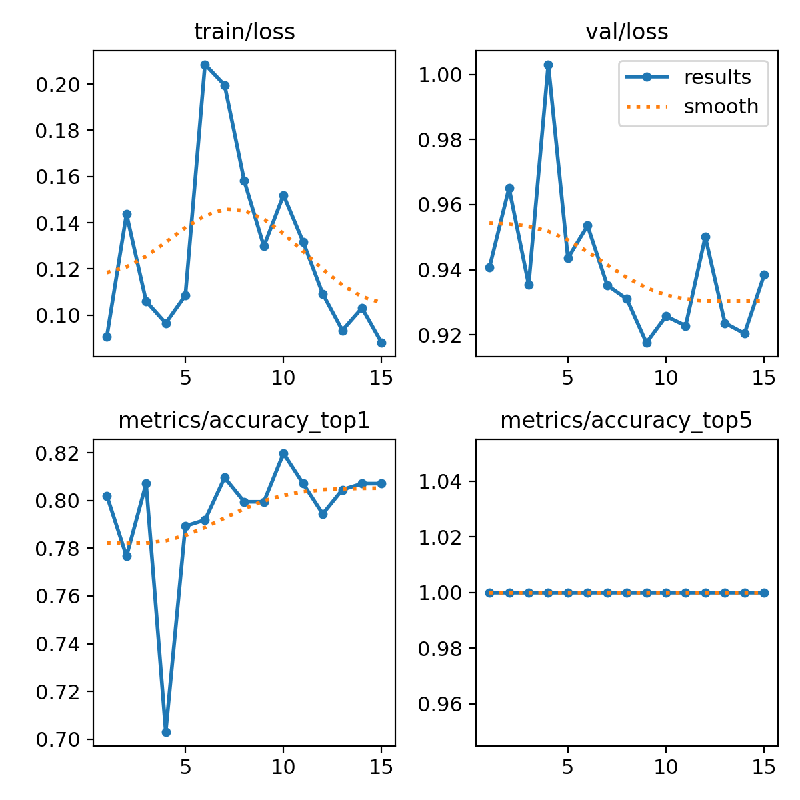

In [25]:
load_img("/content/runs/classify/train222/results.png", target_size=(800, 800))

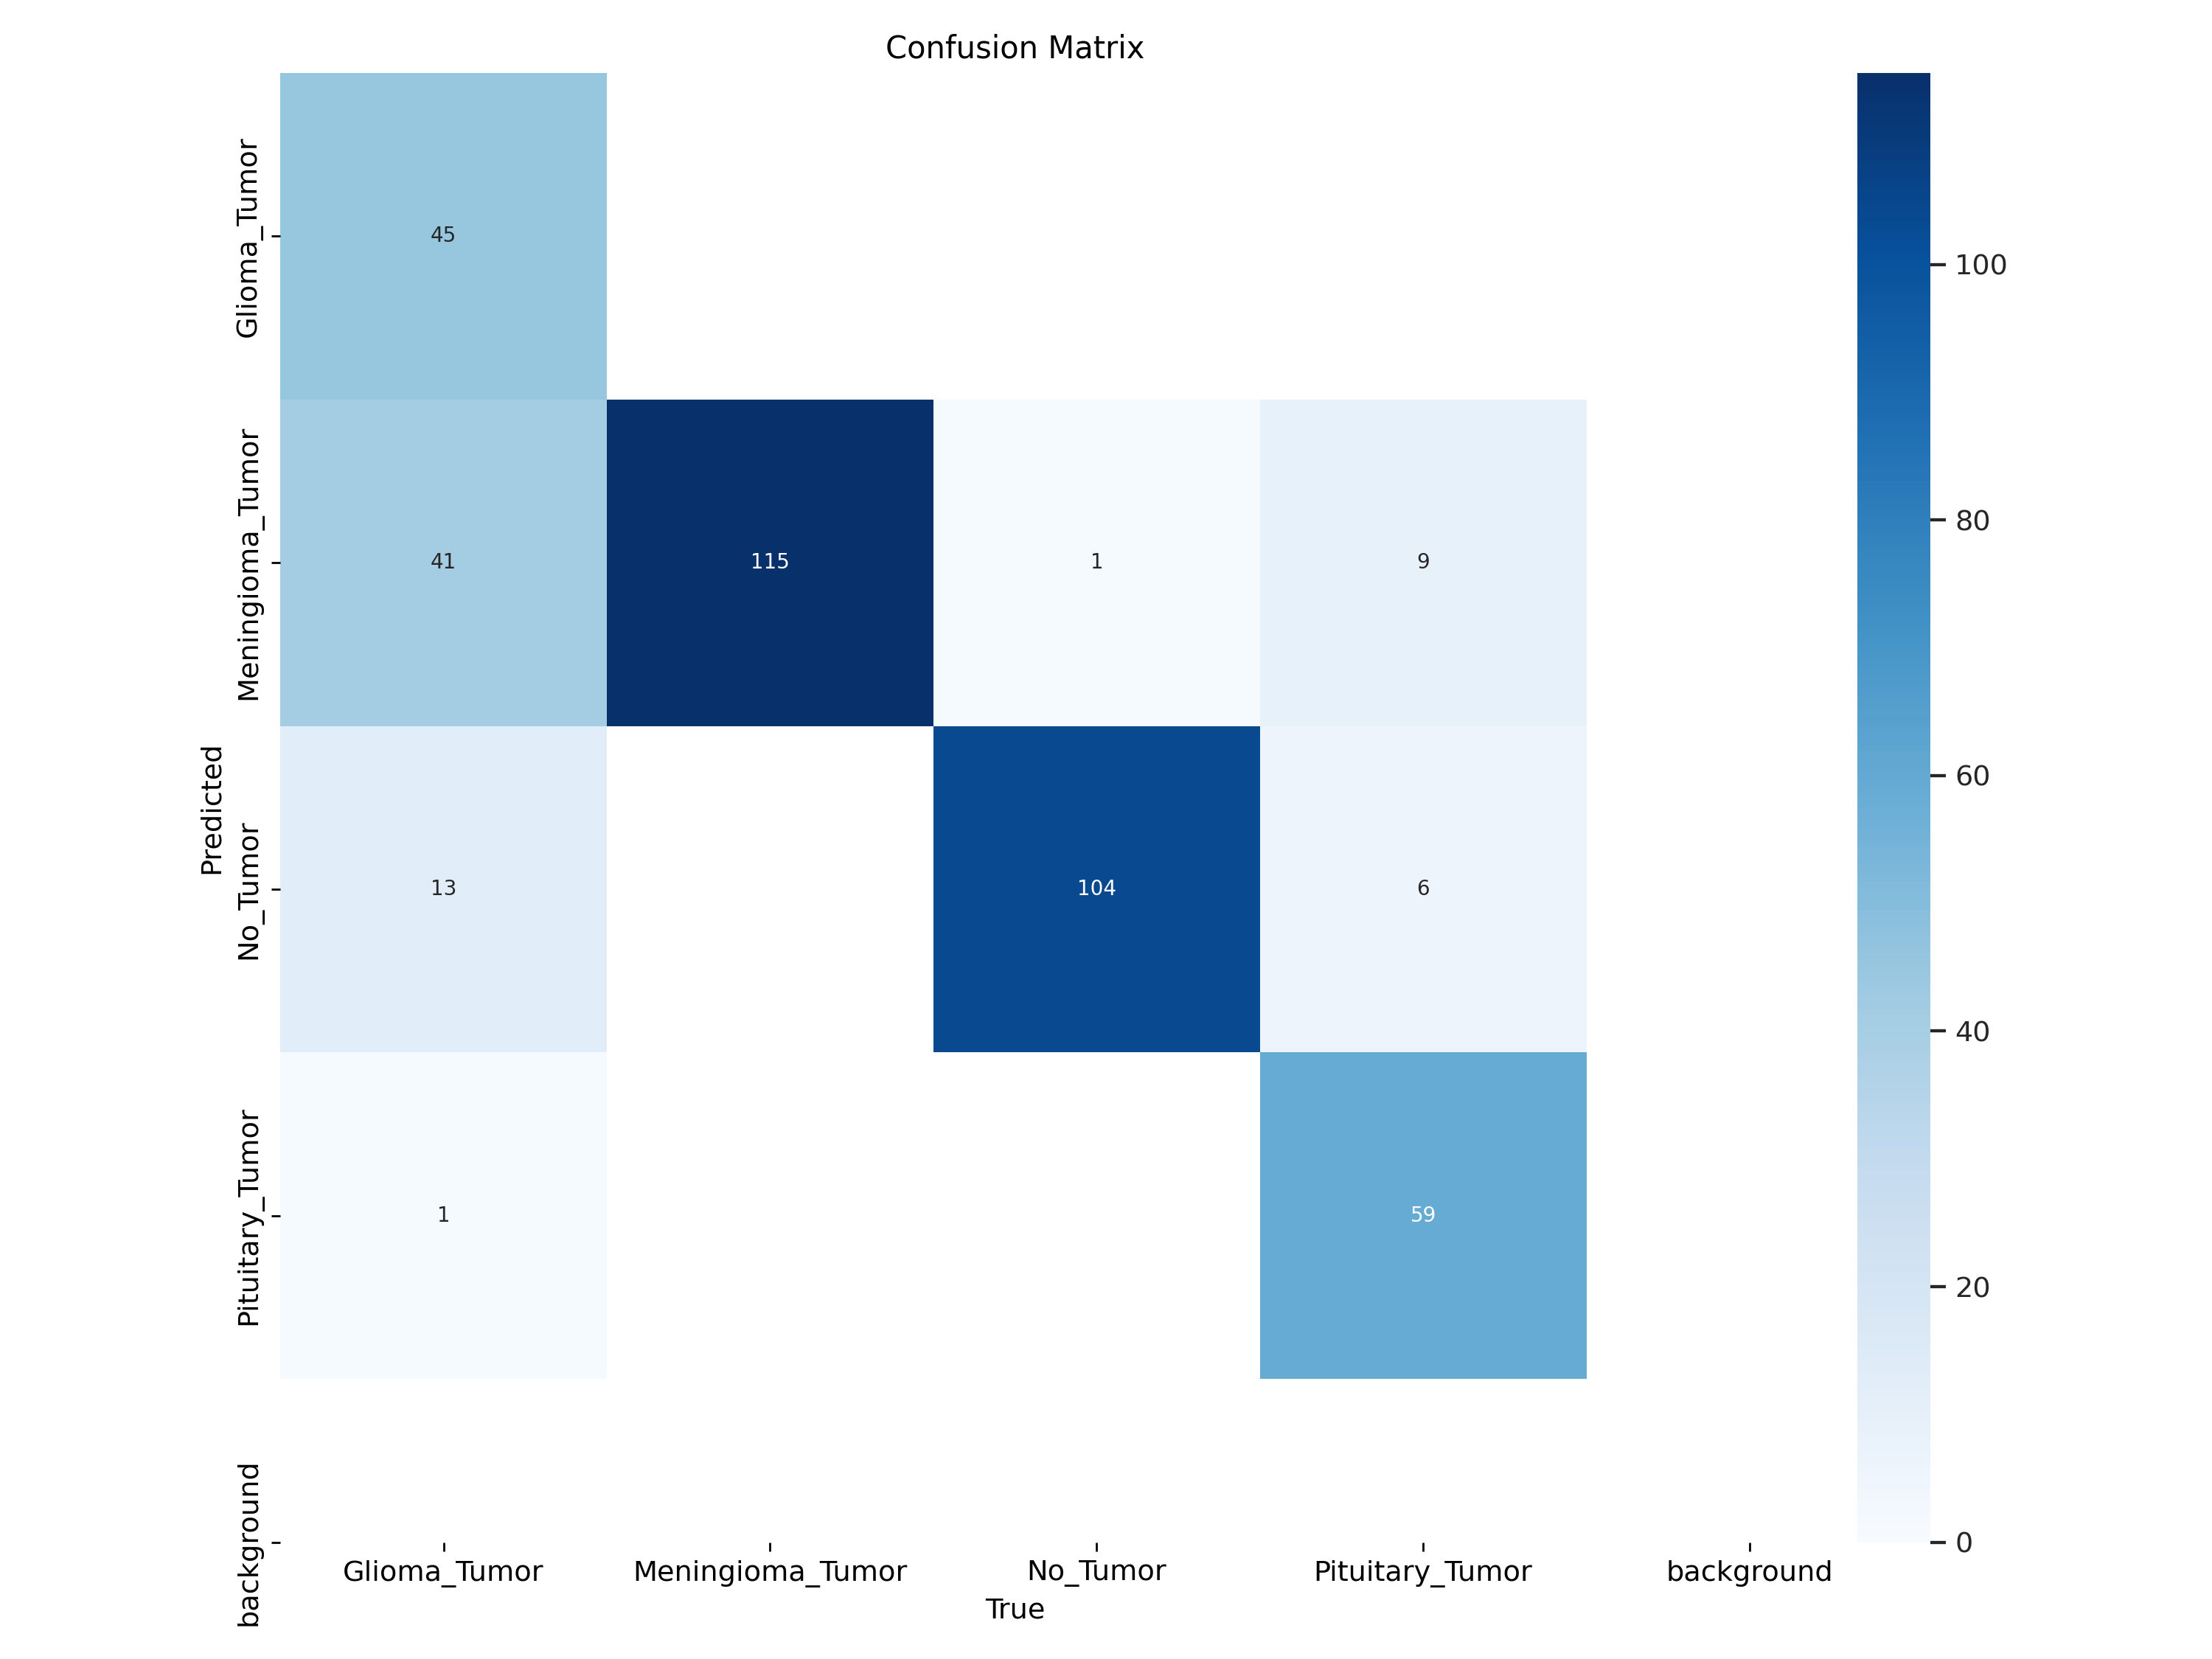

In [24]:
load_img("/content/runs/classify/train222/confusion_matrix.png")

## Eddy